# Introduction to Financial Python
## Tutorial 7 - Random Variables and Distributions

### Variables aleatorias
En primer lugar, empecemos con el concepto de variable aleatoria. Una variable aleatoria se puede considerar como una extracción de una distribución cuyo resultado previo a la extracción es incierto. Imagina que tiras un dado, sabes que tu probabilidad de obtener cada uno es de 1/6, pero no sabes cuál es el número de tu siguiente tirada. Si tiramos los dados N veces y registramos el número de cada tirada, una colección de esos números se llama variable aleatoria discreta. Una variable discreta puede tomar un número finito de valores. En nuestro ejemplo, sólo podemos tomar números de {1,2,3,4,5,6}. El otro tipo de variable es la variable aleatoria continua. Una variable continua puede tomar cualquier valor en un rango determinado. Puedes pensar en la tasa de rendimiento como una variable continua, teóricamente puede tomar cualquier valor de (-∞,+∞).


### Distribuciones
Cada variable aleatoria sigue una distribución de probabilidad, que es una función que puede considerarse que proporciona las probabilidades de ocurrencia de los diferentes resultados posibles en un experimento. ara cada función de distribución de probabilidad, tenemos una función de distribución acumulativa (CDF). Se define como P(X≤x), que modela la probabilidad de que la variable aleatoria X tome un valor menor o igual a x. 

#### Distribución uniforme
La distribución uniforme es el tipo más simple de distribución de probabilidad. Una distribución uniforme discreta tiene el mismo peso asignado a todos los resultados. Tanto el lanzamiento de un dado como el lanzamiento de una moneda de cambio son distribuciones uniformes clásicas. Aquí utilizamos python para simular el lanzamiento de una moneda 10000 veces.

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define una función para simular tirar una moneda
def moneda():
    moneda =  ["Cara", "Sello"]
    return random.choice(moneda)

series = np.array([moneda() for x in range(10000)])
print( series)

['Sello' 'Cara' 'Cara' ... 'Cara' 'Cara' 'Cara']


Podemos representar los valores en el eje de las abscisas y poner su número de ocurrencias en el eje de las ordenadas para tener una visión directa de la distribución

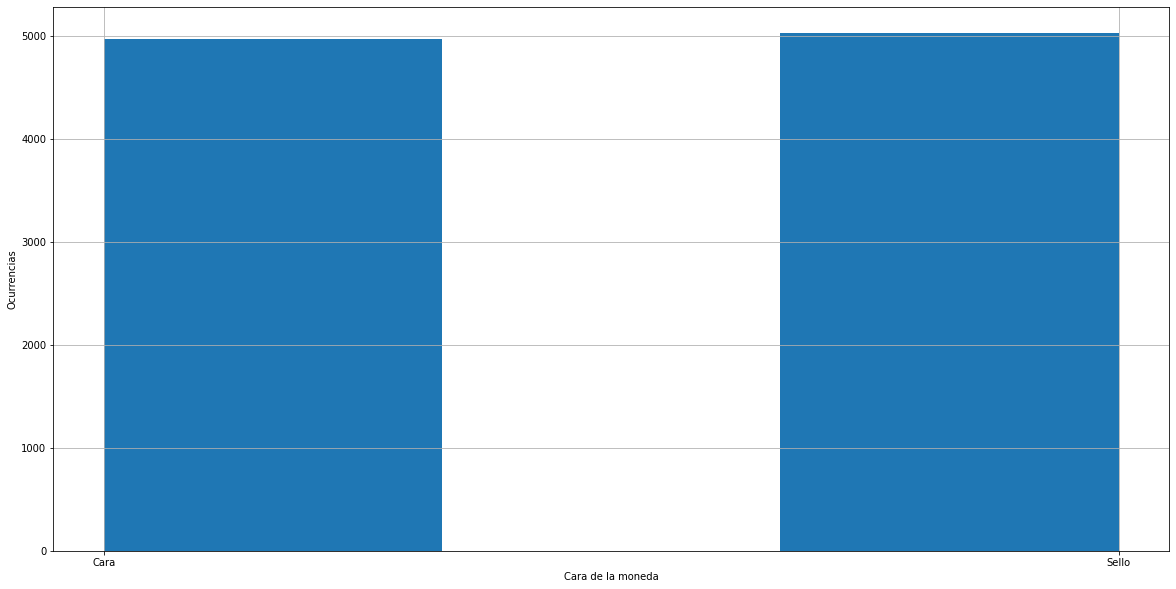

In [ ]:
plt.figure(figsize = (20,10))
plt.hist(series,bins = 3,align = 'mid')
plt.xlabel('Cara de la moneda')
plt.ylabel('Ocurrencias')
plt.grid()
plt.show()

#### Distribución binomial
Una distribución binomial es una distribución de probabilidad discreta del número de aciertos en una secuencia de n experimentos independientes. Simulemos un experimento binomial con una tasa de éxito p = 0,6 y tiempos de experimento n = 10.

In [ ]:
def trial():
    number = [1,2,3,4,5,6,7,8,9,10]
    a = random.choice(number)
    if a<= 6:
        return 1
    else:
        return 0

si el experimento falla retorna un 0, en otro caso retorna un 1.

In [ ]:
res = [trial() for x in range(10)]
print(sum(res))

6


Para ver la distribución más clara, es necesario aumentar el número de las simulaciones.


In [ ]:
def binomial(number):
    l = []
    for i in range(10000):
        res = [trial() for x in range(10)]
        l.append(sum(res))
    return len([x for x in l if x == number])/float(len(l))
print((binomial(6)))

0.2583


Para cada resultado posible, simulamos la probabilidad:

In [ ]:
prob = []
for i in range(1,11):
    prob.append(binomial(i))
prob_s = pd.Series(prob,index = range(1,11))
print(prob_s)

1     0.0011
2     0.0101
3     0.0423
4     0.1101
5     0.1965
6     0.2473
7     0.2143
8     0.1167
9     0.0382
10    0.0071
dtype: float64


Ahora vamos a comprobar si las frecuencias simuladas se acercan lo suficiente a las probabilidades teóricas, haremos la prueba con el 6.

In [ ]:
print((float(math.factorial(10))/(math.factorial(6)*math.factorial(10-6)))*(0.6**6)*(0.4**4))

0.25082265600000003


Podemos graficar los siguientes resultados.

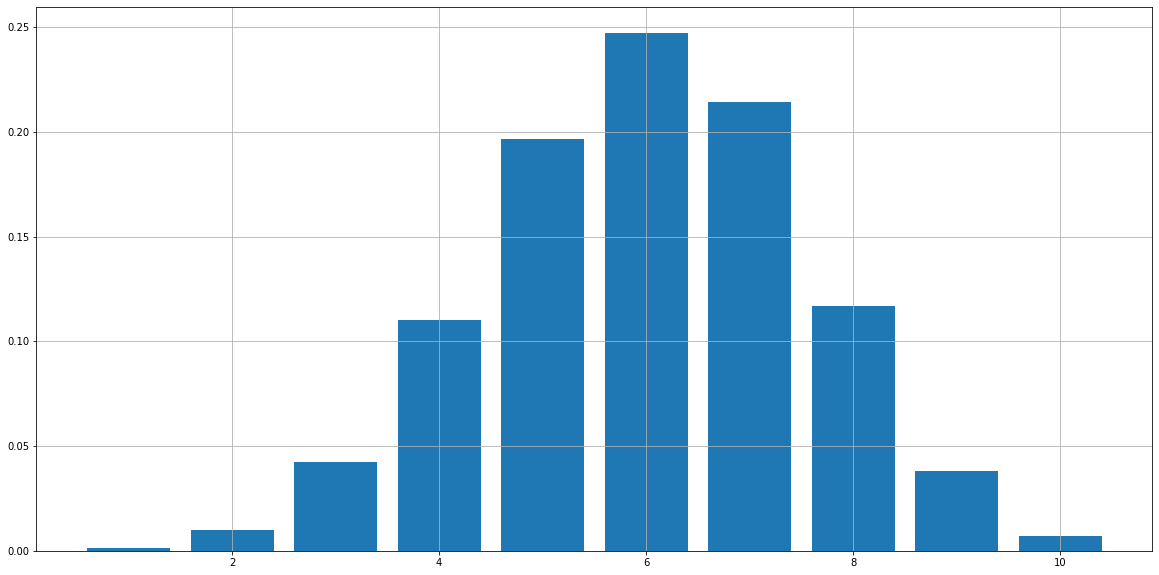

In [ ]:
plt.figure(figsize = (20,10))
plt.bar(range(1,11),prob)
plt.grid()
plt.show()

### Distribución normal
La distribución normal es la más utilizada en las ciencias naturales y, por supuesto, también en la investigación financiera. La PDF de la distribución normal es la siguiente: <br>
$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$ <br>
Donde $\mu$ es la media de la distribución normal, y $\sigma$ es la desviación estándar. <br>
En concreto, si una distribución normal tiene una media 0 y una desviación estándar 1, la llamamos distribución normal estándar. Ahora vamos a simular una distribución normal estándar utilizando los paquetes de Python para ver cómo es:

In [ ]:
!pip install quandl # Para instalar el complemento

In [ ]:
import quandl
quandl.ApiConfig.api_key = 'oNgzGNZtVSfJ2eUay5_U'
spy_table = quandl.get('WIKI/GOOG')
spy = spy_table.loc['2009':'2017',['Open','Close']]
spy['log_return'] = np.log(spy.Close).diff()
spy = spy.dropna()

Hemos calculado el logaritmo de la rentabilidad diaria del índice de Google desde 2009 hasta la actualidad. En primer lugar, veamos cómo son los datos de rentabilidad de la serie temporal.

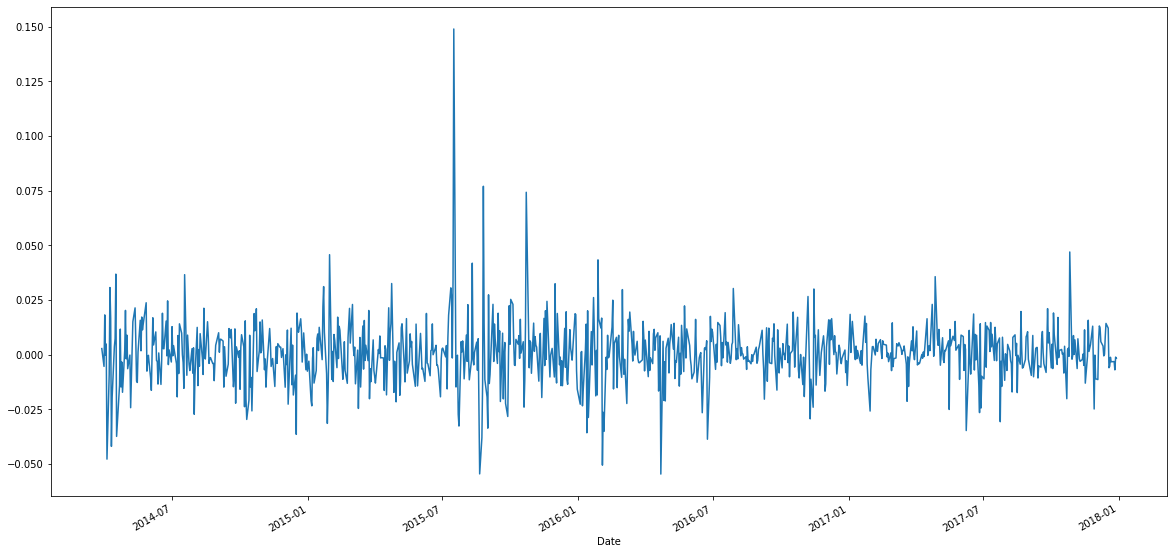

In [ ]:
plt.figure(figsize = (20,10))
spy.log_return.plot()
plt.show()

Se trata de un clásico gráfico de rendimientos diarios. Ahora vamos a trazar el gráfico de densidad de los rendimientos.

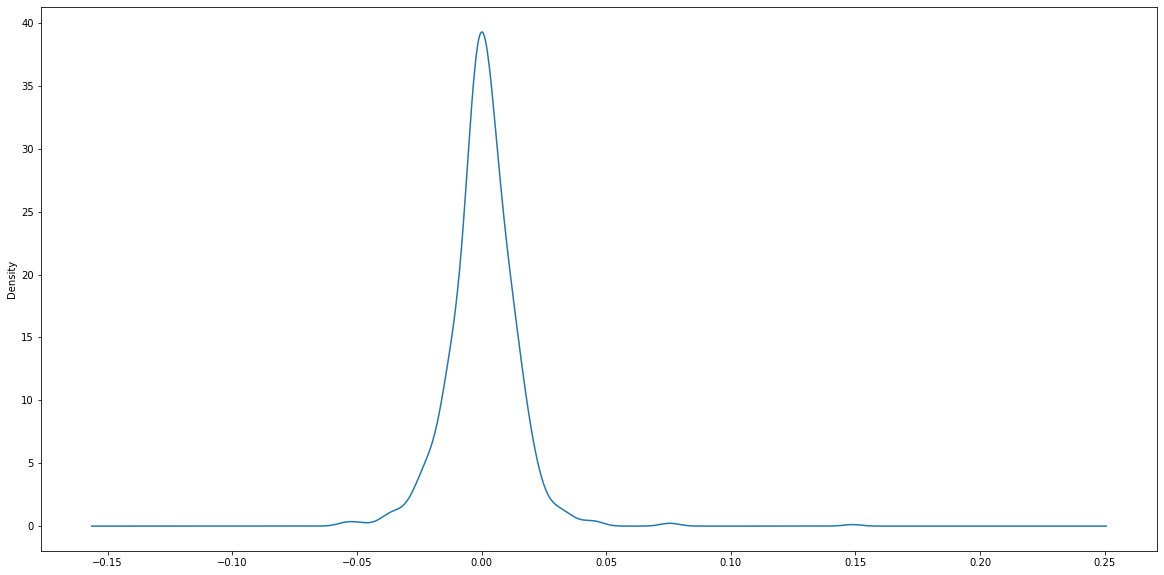

In [ ]:
plt.figure(figsize = (20,10))
spy.log_return.plot.density()
plt.show()

Podemos demostrar la distribución normal con diferentes medias y varianzas por simulación.

<Figure size 1440x720 with 0 Axes>

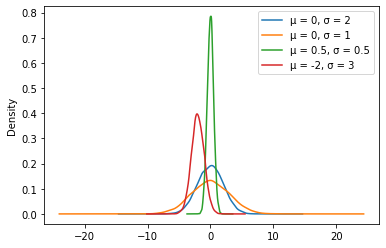

In [ ]:
de_2 = pd.Series(np.random.normal(0,2,10000),name = 'μ = 0, σ = 2')
de_3 = pd.Series(np.random.normal(0,3,10000),name = 'μ = 0, σ = 1')
de_0 = pd.Series(np.random.normal(0,0.5,10000), name ='μ = 0.5, σ = 0.5')
mu_1 = pd.Series(np.random.normal(-2,1,10000),name ='μ = -2, σ = 3')
df = pd.concat([de_2,de_3,de_0,mu_1],axis = 1)
plt.figure(figsize=(20,10))
df.plot.density()
plt.show()